#### Computer Vision Workflow

````
1) inputs usually in the shape of 224*224*3 but can vary based on problem
2) these inputs are converted into number through numerical encoding 
3) these numerical encoded inputs are shared to the machine learning algorithm usally CNN but now even transformers giving good results
4) the algorithm outputs predicted outputs that is a prob value of how close does the machine thinks the inputed image is to the respective class. ````

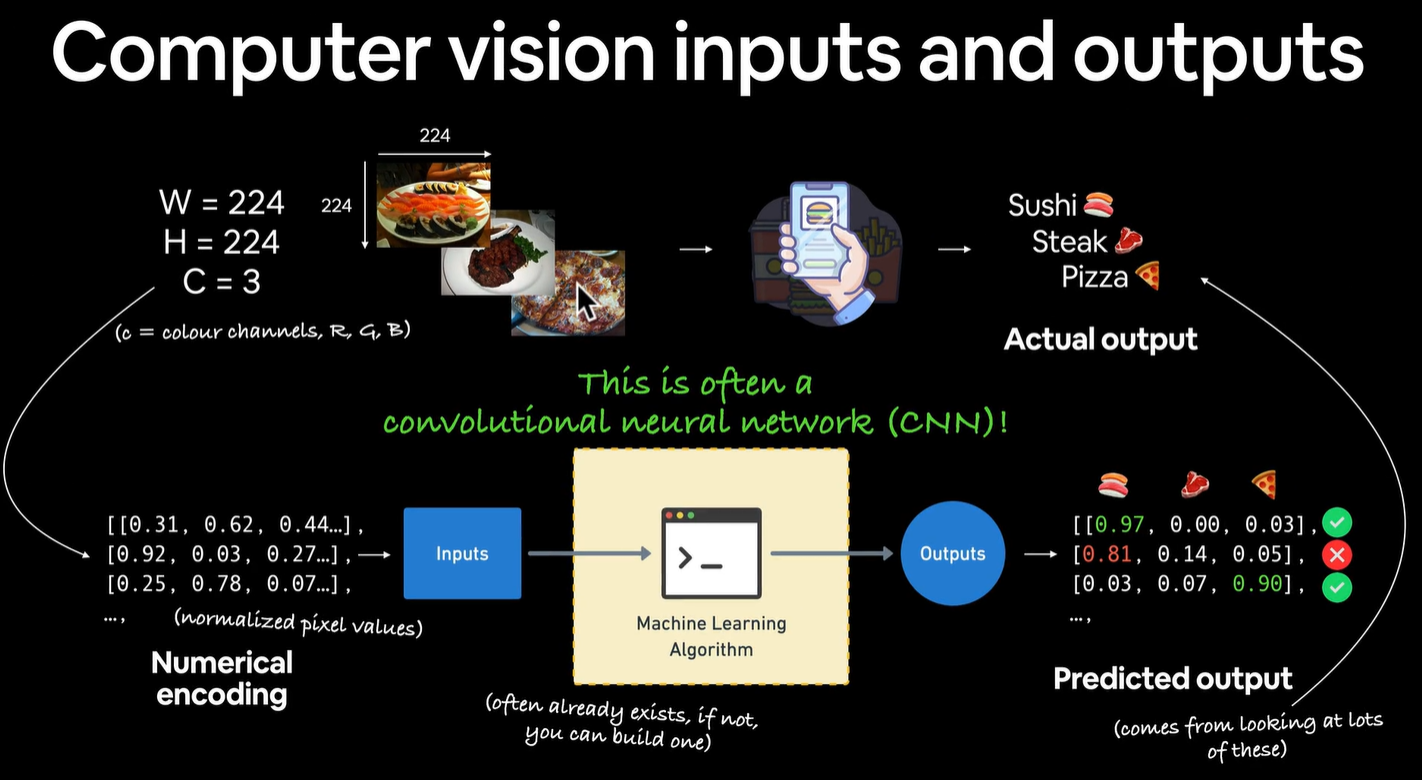

#### Computer Vision Workflow

````
1) inputs usually in the shape of 224*224*3 but u can see here it is 28*28. Usually inputs are represented as batchsize,color_channles,height,width
2) these inputs are converted into number through numerical encoding 
3) these numerical encoded inputs are shared to the machine learning algorithm usally CNN but now even transformers giving good results
4) the algorithm outputs predicted outputs that is a prob value of how close does the machine thinks the inputed image is to the respective class.
````

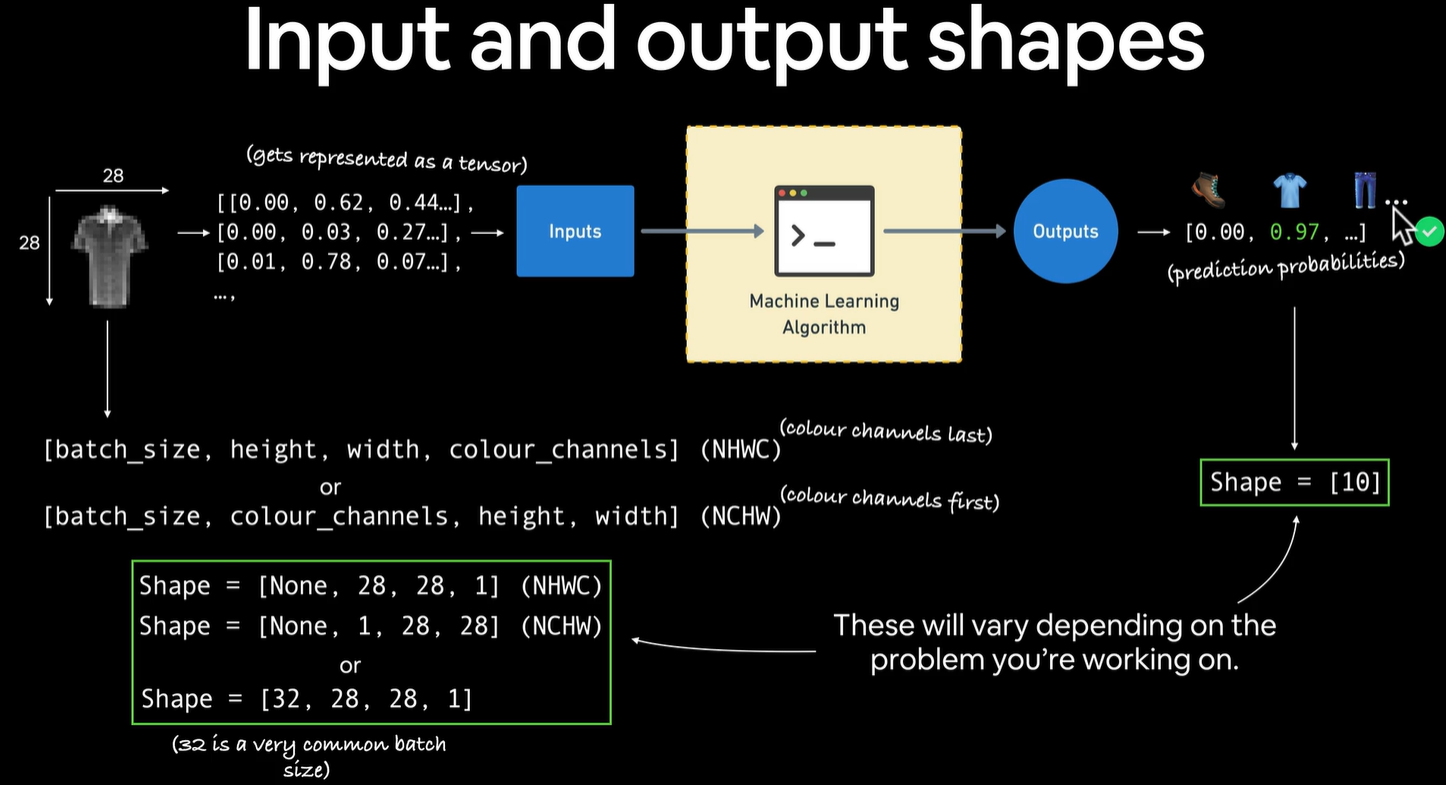

## Computer Vision Workflow

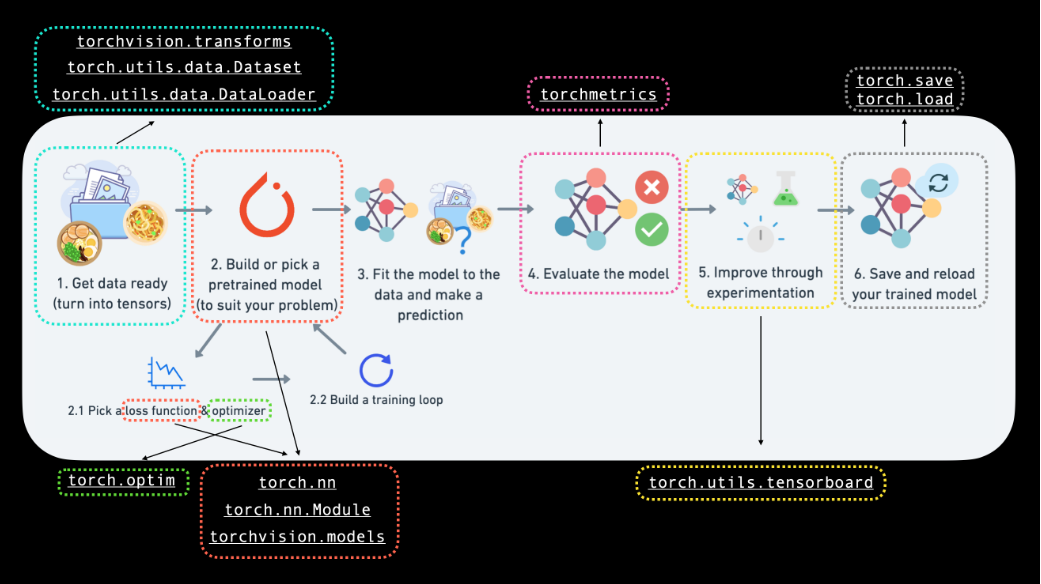

## Computer Vision Library

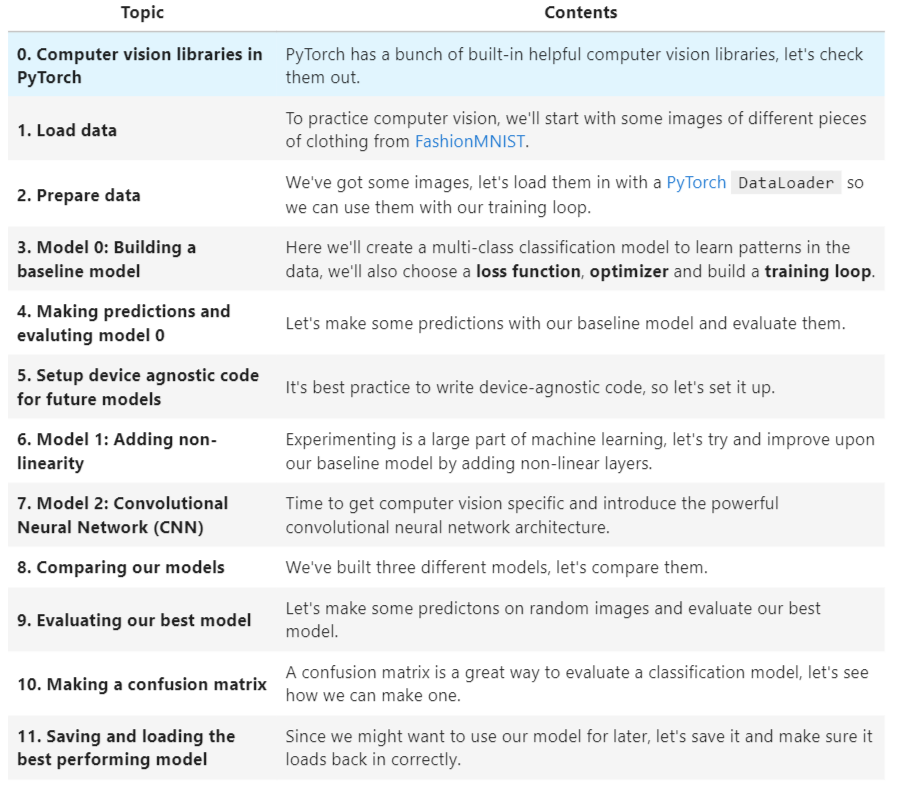

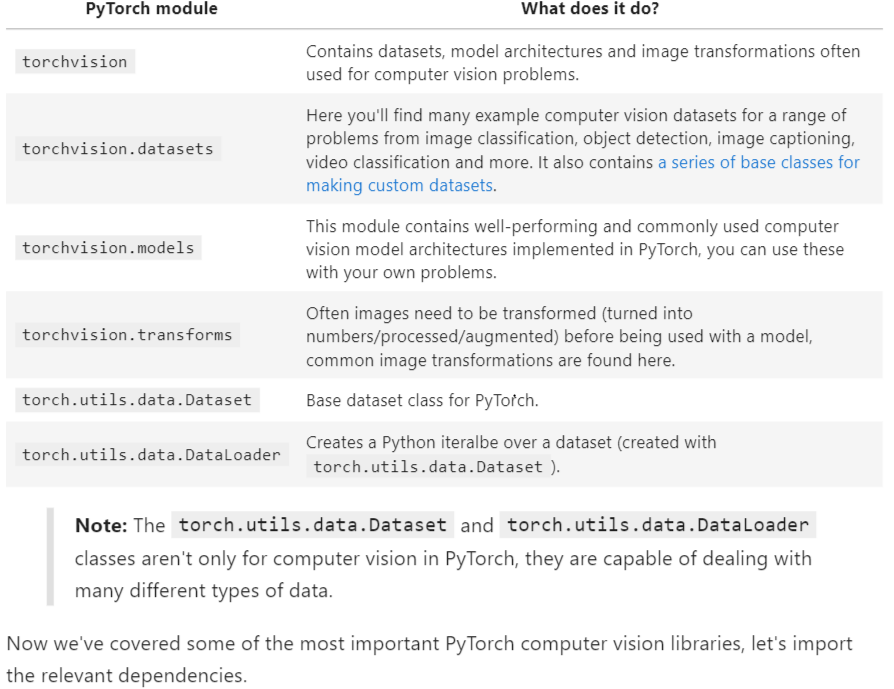

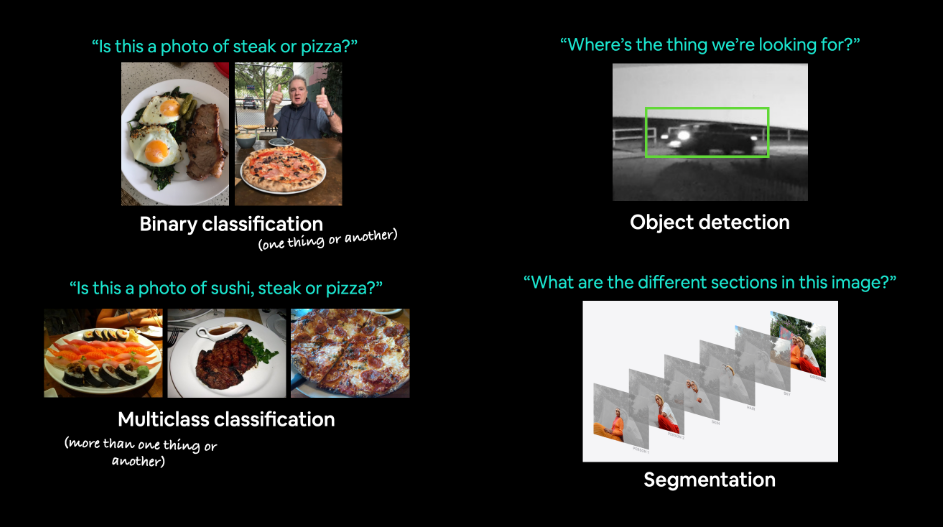

# Convolutional Neural Network

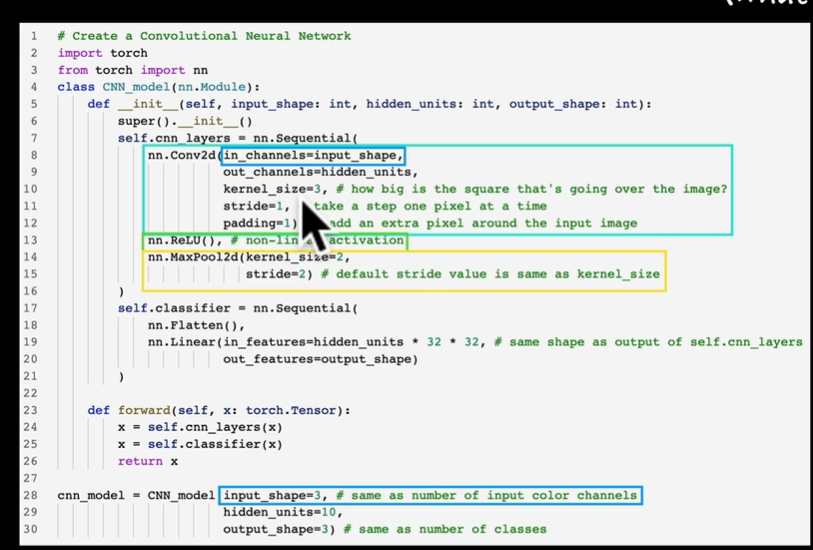

1. torchvision - base domain library for PyTorch computer vision
2. torchvision.datasets - get datasets and data loading functions for computer vision here
3. torchvision.models - get pretrained computer vision models that you can leverage for your own problems
4. torchvision.transforms - functions for manipulating your vision data (images) to be suitable for use with an ML model
5. torch.utils.data.Dataset - Base dataset class for PyTorch.
6. torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor # covert image or np array to tensors

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu102
0.9.1+cu102


In [2]:
# Setup device-agnostic code
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
!pip3 list

Package                 Version
----------------------- -----------
absl-py                 0.10.0
aiohttp                 3.7.4.post0
albumentations          0.5.2
amatlib                 1.4.0
antlr4-python3-runtime  4.8
anytree                 2.8.0
astor                   0.8.1
astunparse              1.6.3
async-timeout           3.0.1
attrs                   19.3.0
Babel                   2.9.1
bce-python-sdk          0.8.64
beartype                0.8.1
beautifulsoup4          4.11.1
bleach                  3.1.0
blis                    0.7.5
bs4                     0.0.1
cached-property         1.5.2
cachetools              4.1.1
catalogue               1.0.0
cdsw                    1.0.0
certifi                 2019.11.28
cffi                    1.14.4
cfgv                    3.3.1
chardet                 3.0.4
clang                   5.0
click                   7.1.2
comtypes                1.1.14
confuse                 1.7.0
contextvars             2.4
cryptography         

### Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [4]:
#setup train data

train_data = datasets.FashionMNIST(
    root = 'data', #where to download
    train = True , #if false we will get test dataset
    download = True,
    transform = torchvision.transforms.ToTensor(), #convert the image or numpy data to tensors
    target_transform = None #how do we wanna transform the labels/target, currently none because we are not converting the labels to tensors
)

In [5]:
#setting up test data

test_data = datasets.FashionMNIST(
    root = 'data', #where to download
    train = False , #if false we will get test dataset
    download = True,
    transform = ToTensor(), #convert the image or numpy data to tensors
    target_transform = None #how do we wanna transform the labels/target, currently none because we are not converting the labels to tensors
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
#see first training example

image,label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [8]:
label

9

In [9]:
#see what label 9 denotes

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [11]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

so 9 denotes the ankle boot images

### Input and Output Shapes 

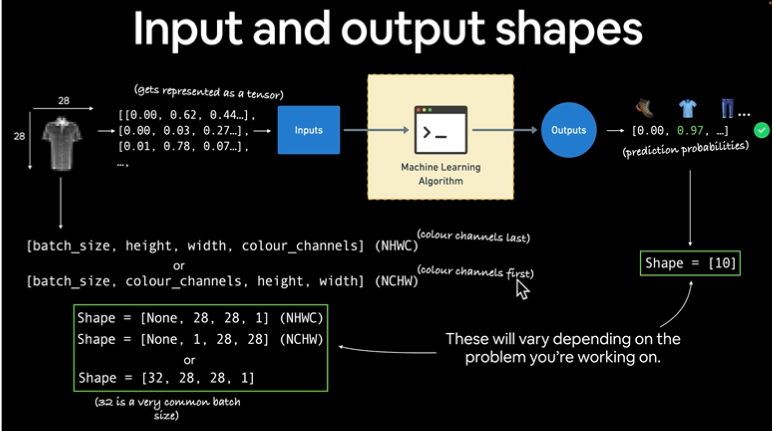

In [12]:
# Now before starting to build our model we need to know input shape and output shape

print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

#we learn that our image shape is 1,28,28 
#the color channels for grey scale is 1 because the black image is 0 and for the white in image it varies so only white has values the rbg has 3 channel



Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


`` 1. In our case there are 10 labels, so our output shape is 10
2. Our Image shape is (Batchsize, 1, 28,28) #can be none or 32 ``


Image Shape : torch.Size([1, 28, 28])


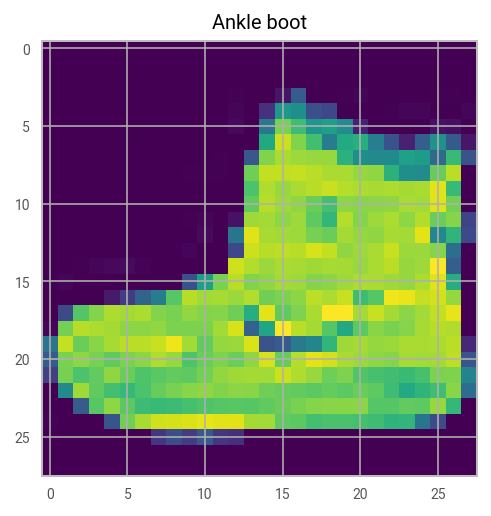

In [13]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.title(class_names[label]);

plt.imshow(image.squeeze()) #squeezing colorchannel and keeping only height and width

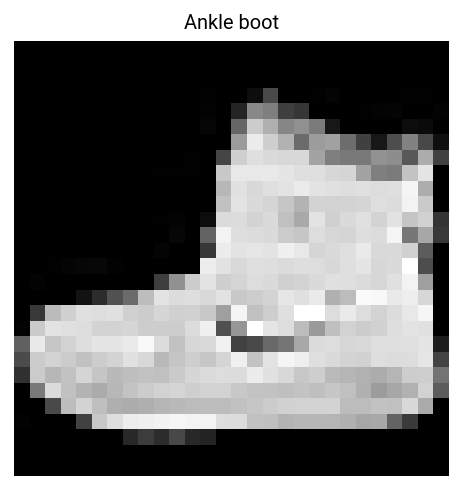

In [14]:
#plt in gray scale

plt.imshow(image.squeeze(), cmap ='gray')
plt.title(class_names[label]);
plt.axis(False); #removing grid

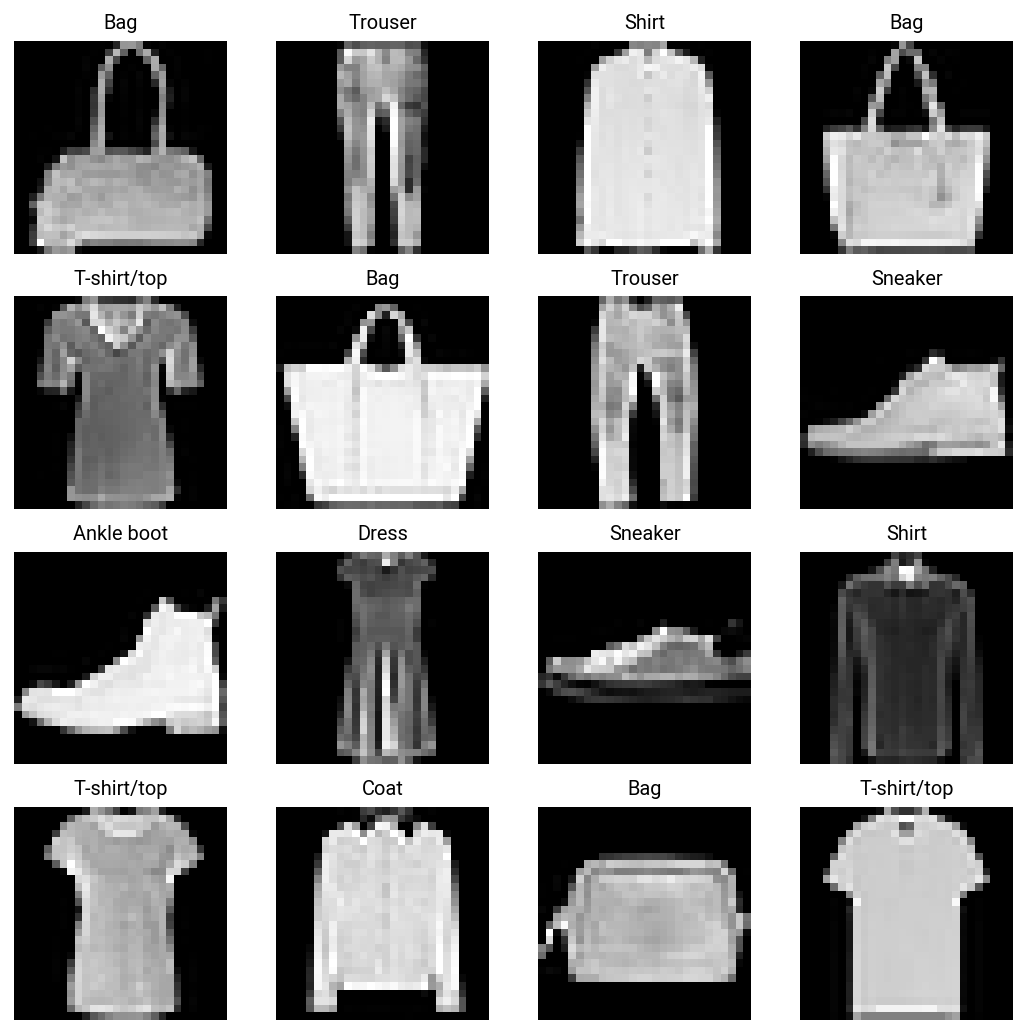

In [15]:
#plot more images by using randomness

#torch.manual_seed(42)
fig = plt.figure(figsize =(9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size =[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i);
    plt.imshow(img.squeeze(), cmap ='gray')
    plt.title(class_names[label]);
    plt.axis(False); #removing grid
    

In [16]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [17]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### DataLoader

``` Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.
For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs ```

we have batchsize = 32. so 32 images per sample. 

##### So total number of sample = Num of data/ batchsize = 60000/32

In [18]:
#turn dataset into dataloaders

from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                             batch_size=32,
                             shuffle=True)

In [19]:
#turn dataset into dataloaders

from torch.utils.data import DataLoader
test_dataloader = DataLoader(dataset = test_data,
                             batch_size=32,
                             shuffle=False)

In [20]:
print("#60000/32" ,len(train_dataloader), len(test_dataloader))

#60000/32 1875 313


In [21]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ff3443641d0>, <torch.utils.data.dataloader.DataLoader object at 0x7ff33e5bef60>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [22]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
#next(iter(dataloader)) you can only access a single batch of data, this is more effecient than for loop if you want to view a single batch of data
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

##### so our each iteration has 32 samples of images indicating 32 images in one iterations. the labels size denotes 32 labels 

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


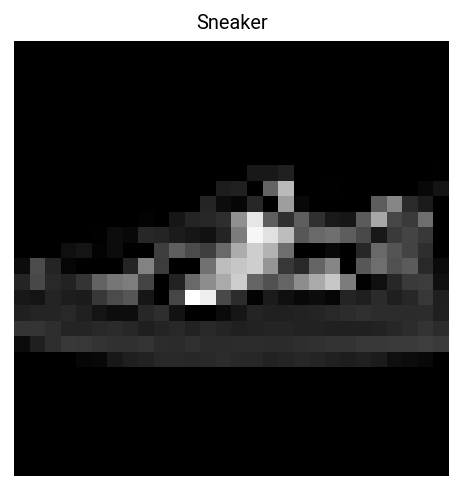

In [23]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Build a basline model

##### start simply and add complexity when necessary

In [24]:
#create a flatten layer as we are gonna create linear model our output is one class per one image

flatten_model = nn.Flatten()

#get a single sample

x = train_features_batch[0]

x.shape

# Flatten the sample

output = flatten_model(x)


#seeing what flatten model does to our images. 

print(f" Shape before flattening: {x.shape} -> [color_channels,height,weight]")
print(f" Shape after flattening: {output.shape} -> [color_channels,height*width]")

 Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels,height,weight]
 Shape after flattening: torch.Size([1, 784]) -> [color_channels,height*width]


In [25]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3098, 0.2431, 0.2275, 0.2275, 0.2314, 0.2392, 0.2784, 0.2431,
        0.3686, 0.0745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0667, 1.0000, 0.8941, 0.8941, 0.9294, 0.9608, 0.9255, 0.9490,
        0.8471, 0.9725, 0.5529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1098, 0.9333, 0.7765, 0.7569, 0.7451, 0.8235, 0.7804,
        0.7608, 0.7373, 0.8314, 0.4588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.2000, 0.9647, 0.7569, 0.7765, 0.8000, 0.8314,
        0.7922, 0.7843, 0.7569, 0.8706, 0.5059, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [26]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                     out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                     out_features=output_shape)
        )
        
    def forward(self,x):
        return self.layer_stack(x)

In [27]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape= 784,
    hidden_units= 10,
    output_shape= len(class_names)).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

###  3.1 Setup loss, optimizer and evaluation metrics
1. Loss function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()
2. Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)
3. Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [29]:

# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

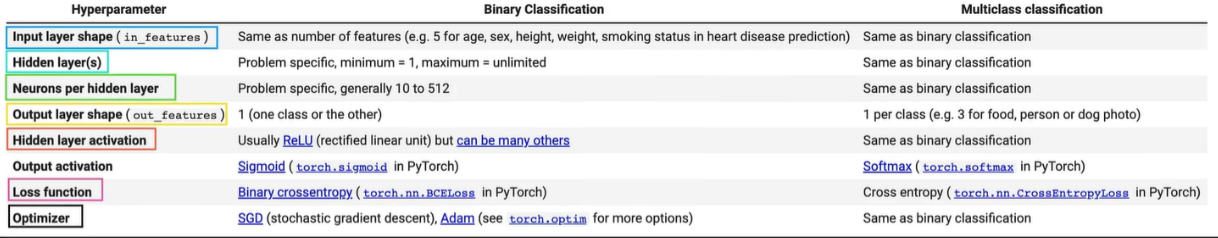

### 3.2 Creating a function to time our experiments

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [30]:
print(torch.device)

<class 'torch.device'>


In [31]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float, 
                     device: torch.device = None):
    #Prints difference between start and end time
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [32]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.5968998670578003e-05

### 3.3 Training loop and training model on batches
``
Loop through epochs.
Loop through training batches, perform training steps, calculate the train loss per batch.
Loop through testing batches, perform testing steps, calculate the test loss per batch.
Print out what's happening.
Time it all (for fun)``

*** Note: Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch ***

In [33]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs
epochs = 3

#creating training and test loop

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #set up train loss 
    train_loss = 0 #to calculate train loss step2
    
    #loop to loop through training batches
    
    for batch,(X,y) in enumerate(train_dataloader):
        
        1.#training model
        model_0.train()
        
        2. #forward pass
        y_pred = model_0(X)  
        
        3.#calculate the loss {per batch}
        loss = loss_fn(y_pred,y)
        train_loss += loss #accumulate the train loss
        
        4. #Optimizer zero grad
        optimizer.zero_grad()
        
        #5. Loss backward
        loss.backward()
        
        #6. Optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)}")
        
    
    #Divide total train loss by length of train dataloader
    
    train_loss /= len(train_dataloader)
    
    #testing
    test_loss, test_acc = 0,0
    model_0.eval()
    
    with torch.no_grad():
        for X_test, y_test in test_dataloader:
        
            #1. forward pass
            test_pred = model_0(X_test)

            #2. calculate loss (accumulately)
            test_loss += loss_fn(test_pred, y_test)

            #3. calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))
        
        #calculate test loss average per batch
        test_loss /= len(test_dataloader)

        #calculate test accuracy average per batch
        test_acc /= len(test_dataloader)
        
    #print out whats happening
    print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f} | Test Acc: {test_acc:.2f}%")


#calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 =  print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:0.5895 | Test loss:0.5527 | Test Acc: 80.05%
Epoch: 1
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:0.4768 | Test loss:0.5130 | Test Acc: 81.56%
Epoch: 2
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:0.4533 | Test loss:0.4913 | Test Acc: 82.60%
Train time on cpu: 25.720 seconds


In [34]:
next(model_0.parameters())

Parameter containing:
tensor([[ 2.7263e-02,  2.9880e-02, -6.5082e-03,  ...,  4.9735e-03,
          6.7536e-03,  1.7489e-02],
        [-1.9043e-02, -3.5688e-02,  1.5381e-02,  ...,  1.2346e-02,
          1.2718e-02,  1.0871e-02],
        [-6.0849e-04,  1.8754e-03,  1.7934e-03,  ...,  1.0001e-04,
         -1.7168e-02,  5.0462e-03],
        ...,
        [-1.1633e-02,  2.7303e-02, -3.2365e-02,  ...,  5.2354e-02,
          4.6364e-02, -2.6007e-04],
        [-2.2933e-02,  2.5266e-02,  2.3865e-02,  ..., -7.4886e-02,
         -2.5530e-02, -4.8233e-03],
        [ 1.7468e-02, -1.5105e-02,  1.3836e-03,  ..., -1.1947e-01,
         -6.6537e-02,  1.0609e-02]], requires_grad=True)

### 4. Make predictions and get Model 0 results

In [35]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
            device=device):
    
    loss, acc = 0,0
    model.eval()
    
    with torch.no_grad():
        for X,y in tqdm(data_loader):
            
            #Make predictions
            y_pred = model(X)
            
            #Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}
            

In [36]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 82.59784345047923,
 'model_loss': 0.4913259744644165,
 'model_name': 'FashionMNISTModelV0'}

### 5. Building a non-linearity Model

In [37]:
!nvidia-smi

Wed Jan  4 17:31:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.106.00   Driver Version: 460.106.00   CUDA Version: N/A      |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:06:00.0 Off |                    0 |
| N/A   35C    P0    43W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
torch.cuda.is_available()

False

In [39]:
# Setup device-agnostic code
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU())
  
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [41]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) 
next(model_1.parameters()).device

device(type='cpu')

In [42]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

In [82]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, 
          device=device):
  
  # 2. Create empty results dictionary
    results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
        test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  
  # 6. Return the filled results at the end of the epochs
    return results

In [83]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer() 

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

NameError: name 'TinyVGG' is not defined

In [45]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
    test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.06816 | Train acc: 61.88%
Test loss: 1.00078 | Test acc: 62.73%

Epoch: 1
----------
Train loss: 0.92105 | Train acc: 66.01%
Test loss: 0.77356 | Test acc: 71.38%

Epoch: 2
----------
Train loss: 0.67093 | Train acc: 75.67%
Test loss: 0.70892 | Test acc: 74.66%

Train time on cpu: 25.971 seconds


In [46]:
print(total_train_time_model_1)

25.970579642802477


In [47]:

# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 74.66054313099042,
 'model_loss': 0.7089180946350098,
 'model_name': 'FashionMNISTModelV1'}

In [48]:

# Get model_1 results dictionary
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 82.59784345047923,
 'model_loss': 0.4913259744644165,
 'model_name': 'FashionMNISTModelV0'}

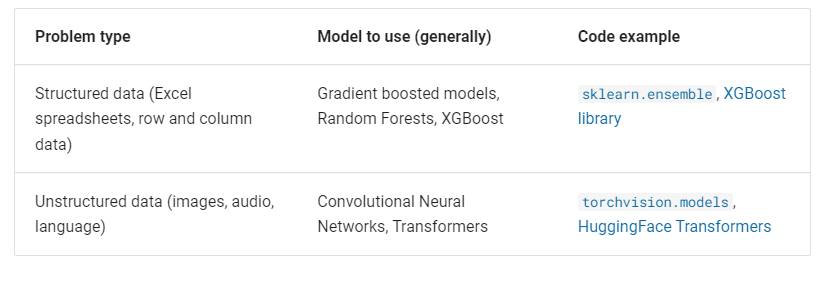

###  Building a Convolutional Neural Network (CNN)

``` 1. input image 
    2. converted into tensor of red, blue and green
    3. tensor being passed into combination of conv. layer, ReLu layer and pooling layer
    4. Linear output layer equal to the number of classes ```
    
*** Note : In deeper CNN, more layer added to the network,more patterns are found *** 


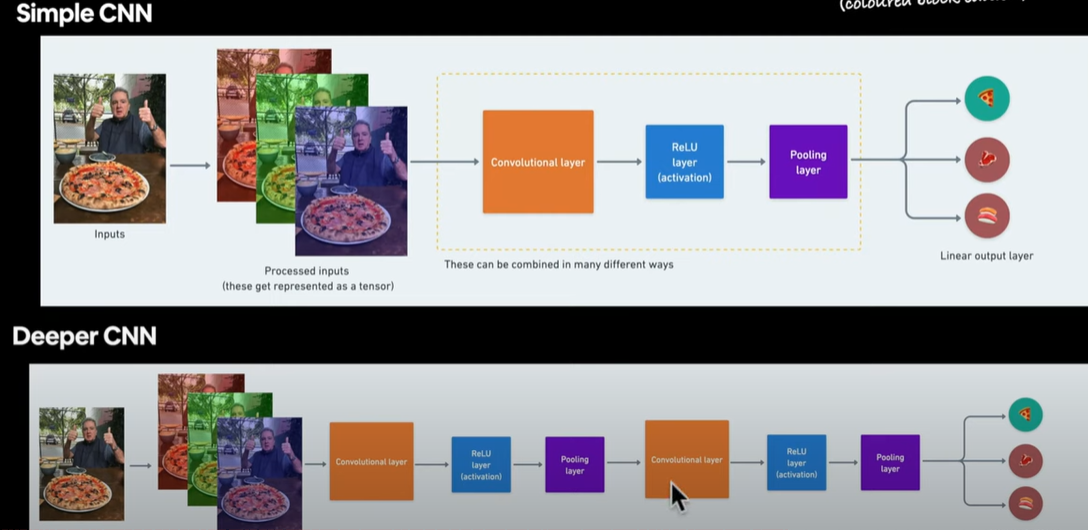

### Usefull resource https://poloclub.github.io/cnn-explainer/

In [49]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In the code above we have recreated the following model, where from conv1_1 to max_pool_1 consitutes to 1 block. 

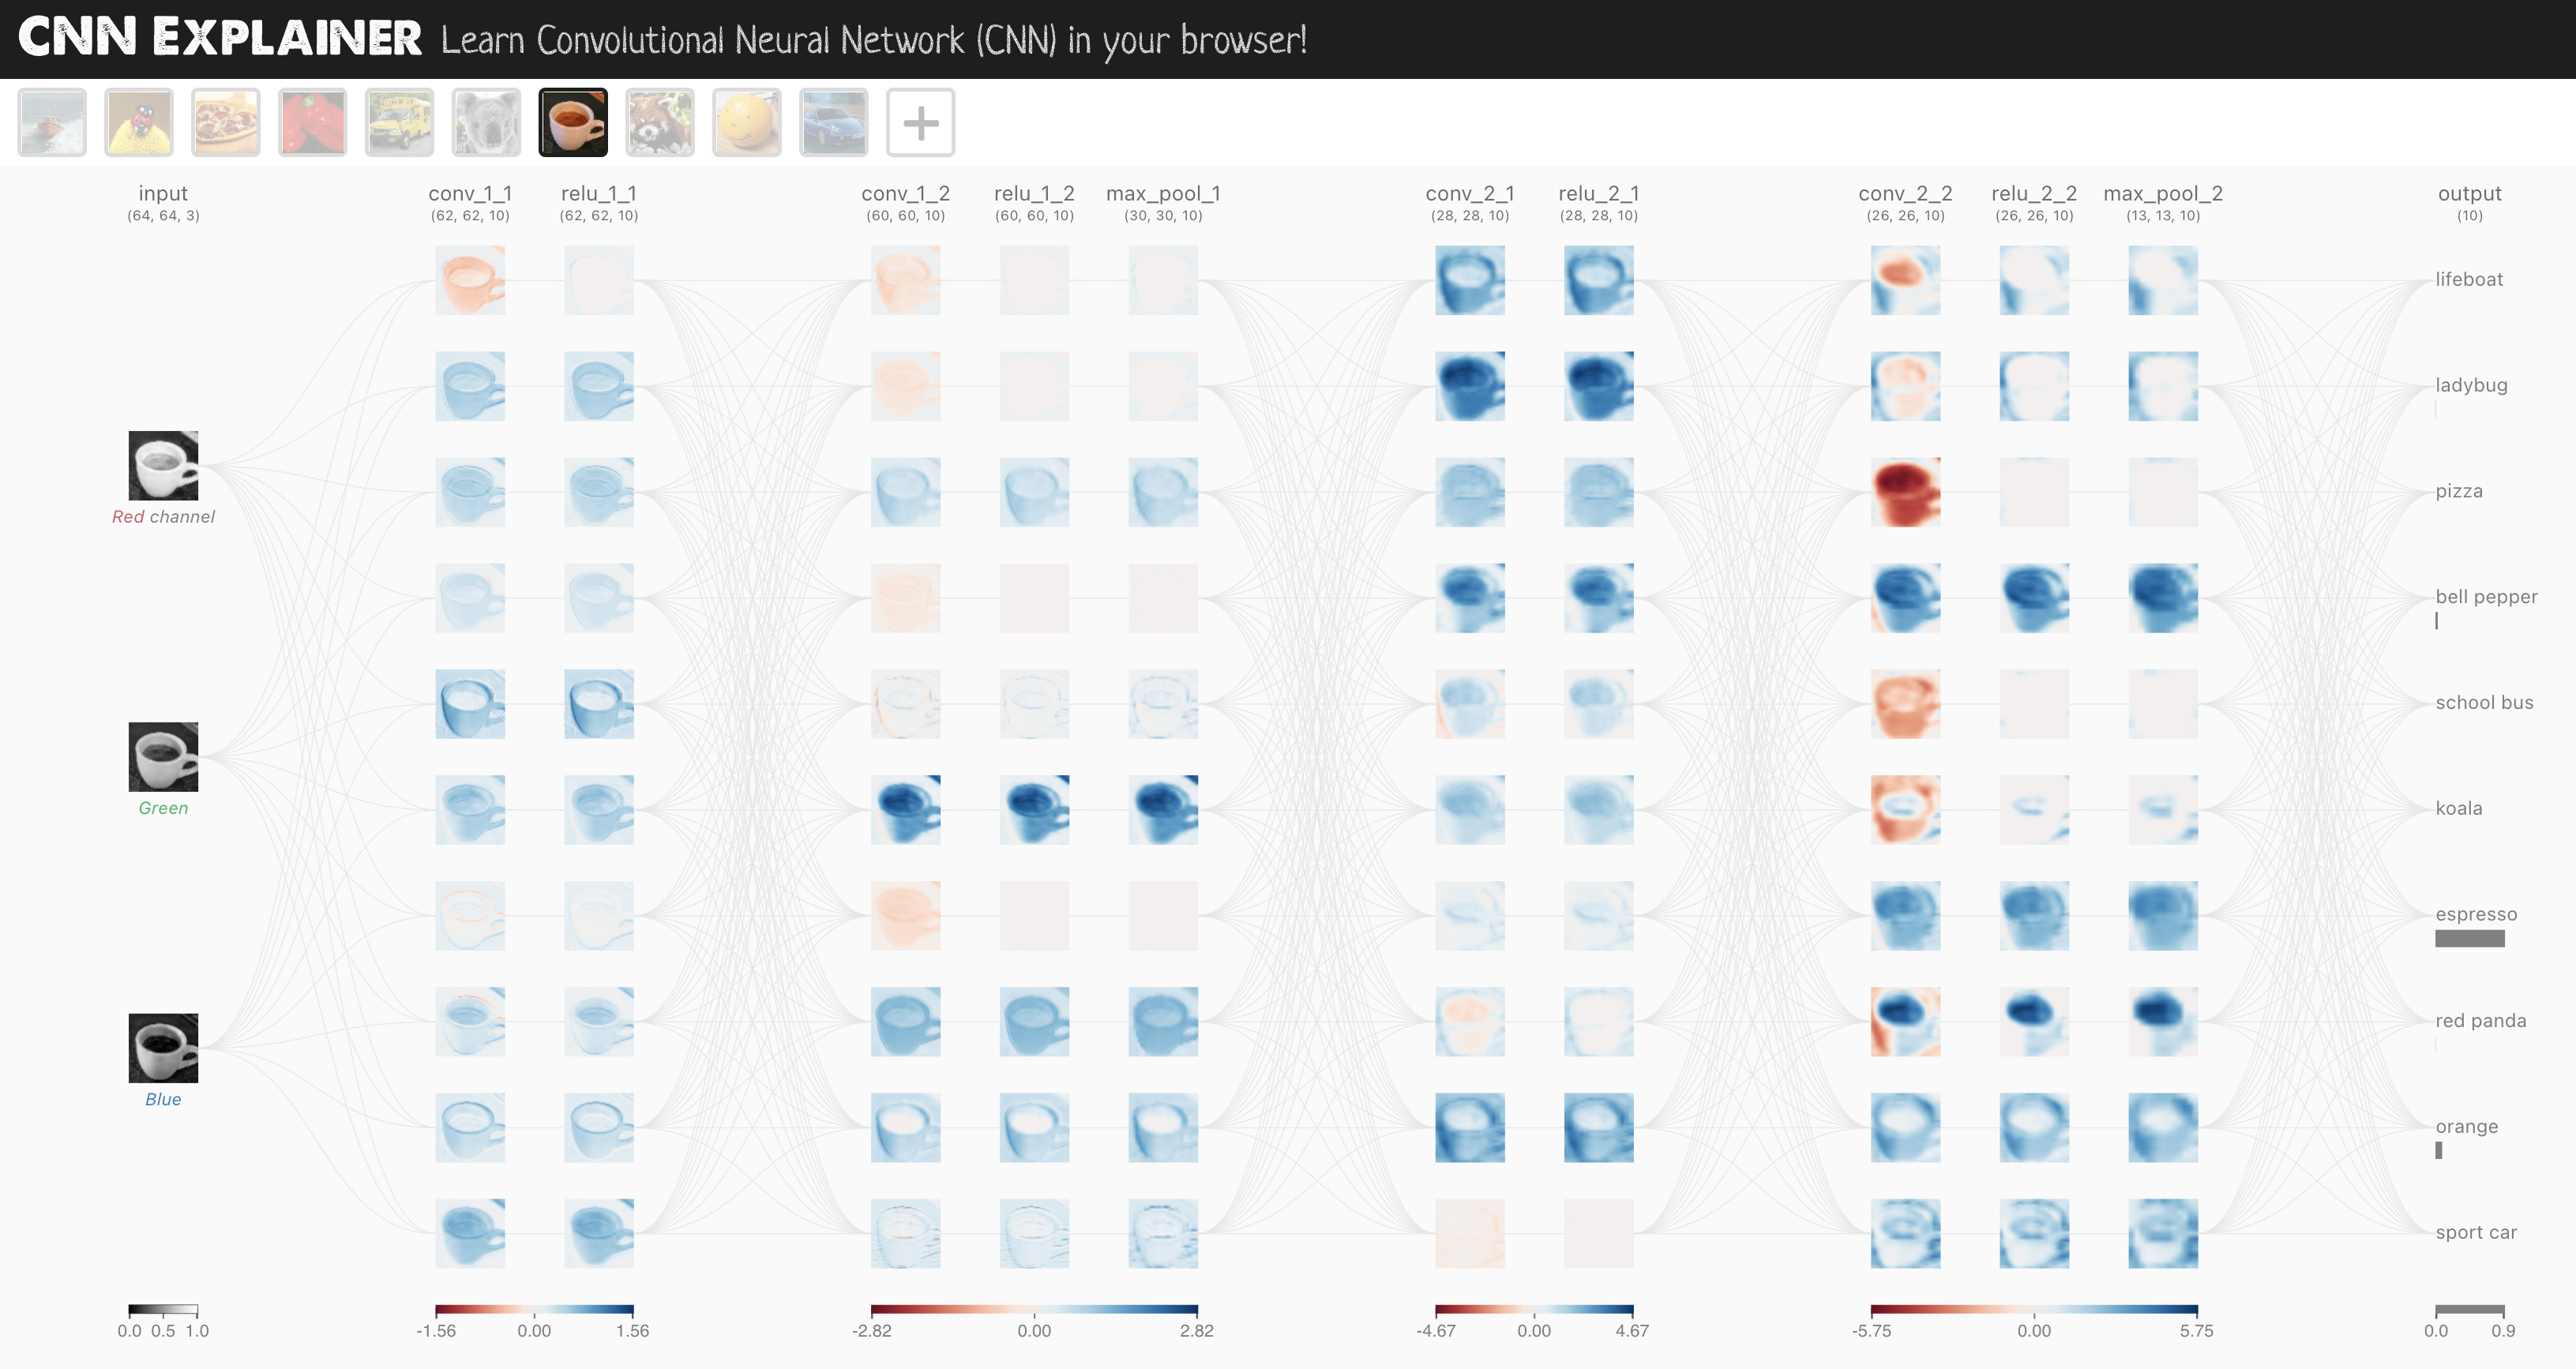

In [50]:
#TO find input shape
image.shape

torch.Size([1, 28, 28])

In [51]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #inputshape denotes the number of color channels 
    hidden_units=10, #number of units used in the above image 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [52]:
model_2.state_dict()

OrderedDict([('block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                      [[[

In [53]:
torch.manual_seed(42)

#create sample batch of random numbers with same size as image batch

images = torch.randn(size =(32,3,64,64))
test_image=images[0]

print(f'Image batch shape: { images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test Image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [54]:
test_image.shape

torch.Size([3, 64, 64])

In [55]:
#create single conv2d layer

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

#pass the data to the layer

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

```Behind the scenes, our nn.Conv2d() is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is how the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer forward() method.

If we check out our conv_layer_2.state_dict() we'll find a similar weight and bias setup as we've seen before.```

In [56]:
# Check out the conv_layer_2 internal parameters
print(conv_layer.state_dict())

OrderedDict([('weight', tensor([[[[-0.0980, -0.0932, -0.0657],
          [ 0.0543,  0.0279, -0.0050],
          [-0.1058,  0.0739,  0.1665]],

         [[-0.1828, -0.0083,  0.0375],
          [-0.1812, -0.0576, -0.0810],
          [-0.1214, -0.1053,  0.0157]],

         [[ 0.0242,  0.1696,  0.0621],
          [-0.0382, -0.1491, -0.1747],
          [ 0.1375, -0.0280, -0.1159]]],


        [[[-0.0600, -0.1148,  0.1637],
          [-0.1369,  0.0516,  0.0649],
          [-0.0878,  0.1724,  0.0266]],

         [[ 0.0372, -0.1917,  0.0656],
          [-0.1913, -0.0182,  0.1658],
          [ 0.0254,  0.0197,  0.1340]],

         [[-0.1544, -0.0901, -0.1373],
          [-0.0800, -0.0452,  0.1142],
          [ 0.0041,  0.0443, -0.1047]]],


        [[[-0.1879, -0.0414, -0.1471],
          [ 0.0456,  0.0834,  0.1407],
          [-0.0360,  0.0112, -0.0756]],

         [[-0.0171, -0.0378,  0.0735],
          [ 0.1024,  0.0684, -0.0780],
          [ 0.1231,  0.0585, -0.1279]],

         [[ 0.1321, 

In [57]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 3, 3]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


#### Stepping through nn.MaxPool2d()

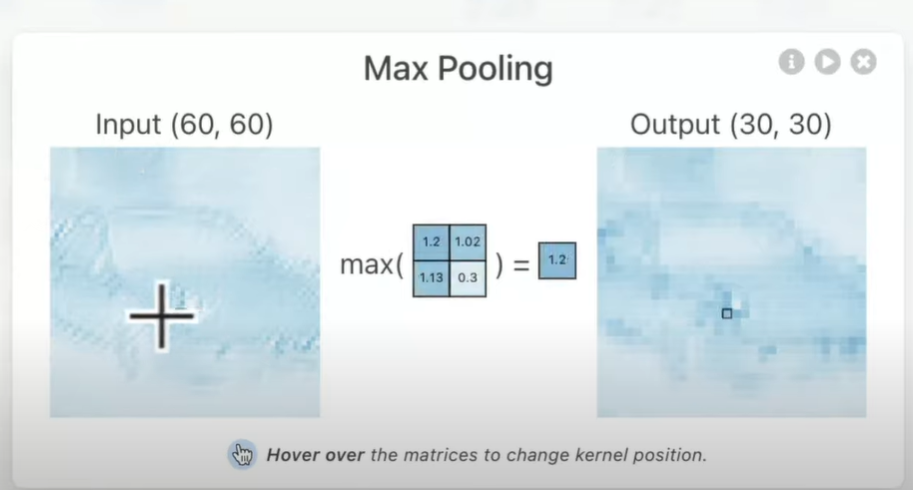


* maximum value in the kernel is given as output. 
* Compresses the input by keeping the important features by taking max of the kernel and giving output. 
* simply inputshape esp height and weight of the image divided by kernel size. i/p= 1,10,62,62. o/p = 1,0,31,31

In [58]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


### Set up loss function and optimizer

In [59]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### Training and testing model_2 

In [60]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    
    train_step(
             data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
    
    test_step(
            data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.71978 | Train acc: 73.58%
Test loss: 0.44401 | Test acc: 83.13%

Epoch: 1
----------
Train loss: 0.37161 | Train acc: 86.63%
Test loss: 0.40905 | Test acc: 85.07%

Epoch: 2
----------
Train loss: 0.33166 | Train acc: 88.07%
Test loss: 0.35464 | Test acc: 87.19%

Train time on cpu: 134.148 seconds


In [61]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 87.19049520766774,
 'model_loss': 0.3546395003795624,
 'model_name': 'FashionMNISTModelV2'}

### Compare model results and training time

In [62]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.491326  82.597843
1  FashionMNISTModelV1    0.708918  74.660543
2  FashionMNISTModelV2    0.354640  87.190495

In [63]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

model_name  model_loss  model_acc  training_time
0  FashionMNISTModelV0    0.491326  82.597843      25.719627
1  FashionMNISTModelV1    0.708918  74.660543      25.970580
2  FashionMNISTModelV2    0.354640  87.190495     134.147642

*** It looks like our CNN (FashionMNISTModelV2) model performed the best (lowest loss, highest accuracy) but had the longest training time***

*** And our baseline model (FashionMNISTModelV0) performed better than model_1 (FashionMNISTModelV1) ****

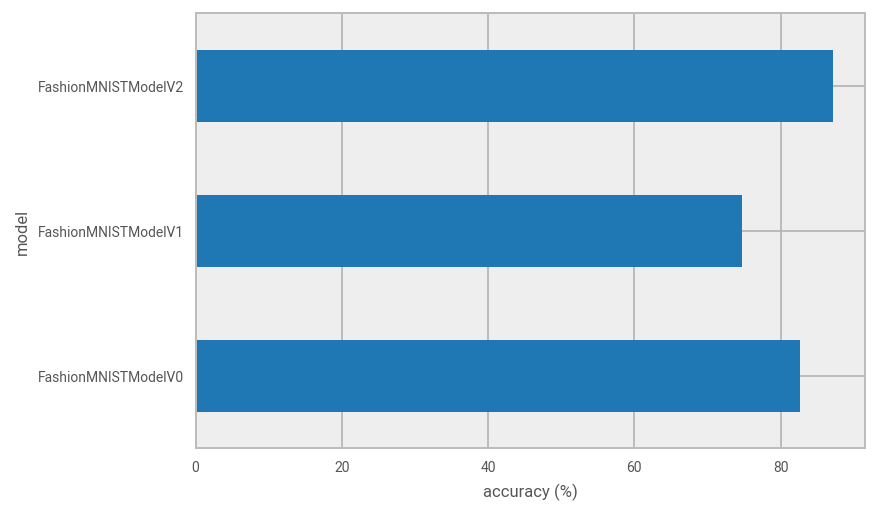

In [64]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### Make and evaluate random predictions with best model

Alright, we've compared our models to each other, let's further evaluate our best performing model, model_2.

To do so, let's create a function make_predictions() where we can pass the model and some data for it to predict on.

In [65]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.no_grad():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [66]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [67]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.6285e-08, 3.0181e-09, 1.6521e-08, 1.2177e-08, 5.3112e-09, 9.9844e-01,
         2.4071e-07, 4.5472e-06, 2.1472e-06, 1.5499e-03],
        [1.3561e-01, 1.6403e-01, 3.9116e-04, 3.7091e-01, 1.6578e-01, 8.4275e-05,
         1.4431e-01, 2.1185e-03, 1.6337e-02, 4.2622e-04]])

And now we can go from prediction probabilities to prediction labels by taking the torch.argmax() of the output of the torch.softmax() activation function.

In [68]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [69]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]))

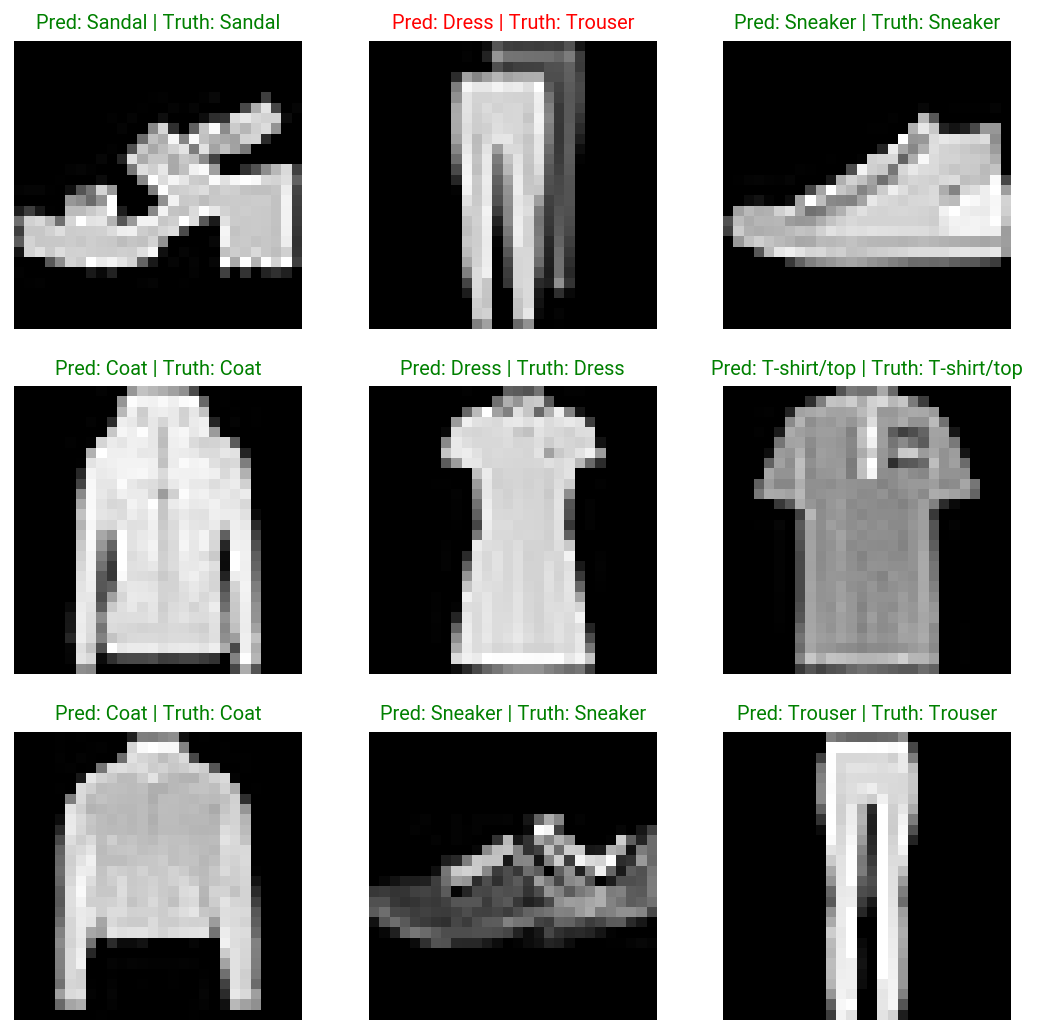

In [70]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]] 

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

In [71]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.no_grad():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

!pip3 install torchmetrics

In [72]:
from torchmetrics.classification import ConfusionMatrix

In [73]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [74]:
y_pred_tensor[:10], test_data.targets[:10]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

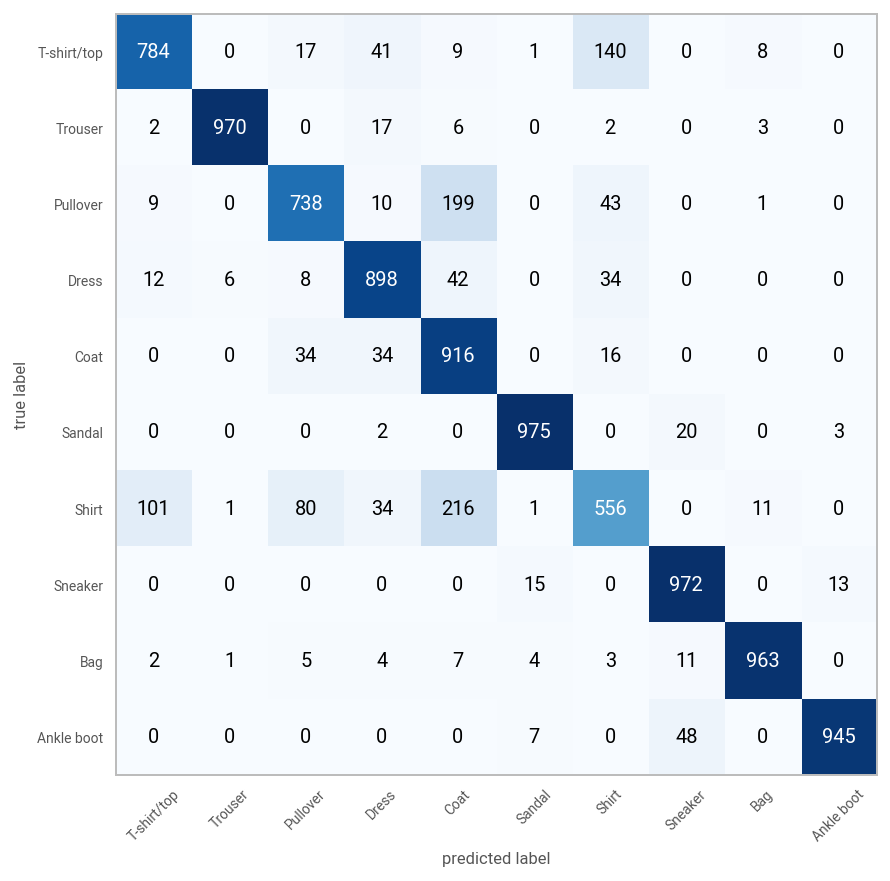

In [75]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

confmat_array = confmat_tensor.numpy()
#confmat_int = confmat_array.astype(int)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_array, # matplotlib likes working with numpy
    class_names=class_names,
figsize =(10,7));

### Saving and loading the model

In [76]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model state_dict() we can load it back in using a combination of load_state_dict() and torch.load().

Since we're using load_state_dict(), we'll need to create a new instance of FashionMNISTModelV2() with the same input parameters as our saved model state_dict()

In [77]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [78]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 87.19049520766774,
 'model_loss': 0.3546395003795624,
 'model_name': 'FashionMNISTModelV2'}

In [79]:
model_2_results

{'model_acc': 87.19049520766774,
 'model_loss': 0.3546395003795624,
 'model_name': 'FashionMNISTModelV2'}


We can find out if two tensors are close to each other using torch.isclose() and passing in a tolerance level of closeness via the parameters atol (absolute tolerance) and rtol (relative tolerance).

If our model's results are close, the output of torch.isclose() should be true.

In [80]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)